In [103]:
import numpy as np
import pandas as pd
from sklearn.feature_selection import SelectKBest, SelectPercentile
from sklearn.feature_selection import f_classif, chi2, mutual_info_classif ,GenericUnivariateSelect
from sklearn.impute import SimpleImputer
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, fbeta_score, classification_report

In [104]:
df=pd.read_csv("titanic_full.csv")

In [105]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [4]:
df.drop(['Name','PassengerId','Ticket'], axis =1, inplace = True)

## statistical info

In [106]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,7.2500,NaN,S
1,1,1,female,38.0,1,0,71.2833,C85,C
2,1,3,female,26.0,0,0,7.9250,NaN,S
3,1,1,female,35.0,1,0,53.1000,C123,S
4,0,3,male,35.0,0,0,8.0500,NaN,S


In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
Age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


In [8]:
df.corr()

,Survived,Pclass,Age,SibSp,Parch,Fare
Survived,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


## Data Cleaning

In [9]:
df.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [10]:
df.drop("Cabin", axis =1, inplace = True)

In [11]:
imputer_mean=SimpleImputer(strategy='mean')
df[['Age']]=imputer_mean.fit_transform(df[['Age']])
imputer_mode=SimpleImputer(strategy='most_frequent')
df[['Embarked']]=imputer_mode.fit_transform(df[['Embarked']])

In [12]:
df.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [13]:
df.duplicated().sum()

111

In [13]:
df.drop_duplicates(inplace = True)

In [14]:
df.duplicated().sum()

0

## Data Visulization

<AxesSubplot:>

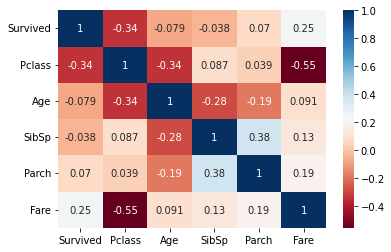

In [15]:
sns.heatmap(df.corr(), annot = True, cmap = "RdBu")

<AxesSubplot:xlabel='Survived', ylabel='count'>

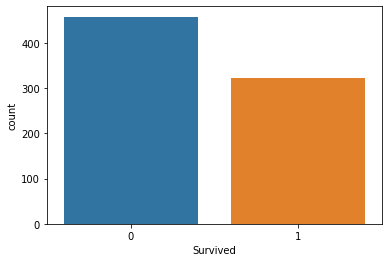

In [16]:
sns.countplot(x='Survived',data=df)

<AxesSubplot:xlabel='Sex', ylabel='count'>

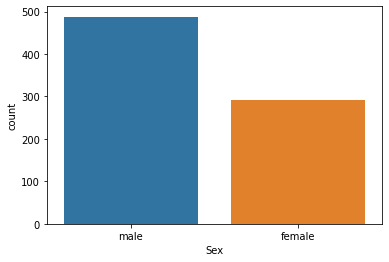

In [17]:
sns.countplot(x='Sex',data=df)

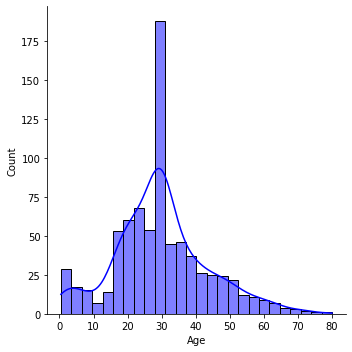

In [18]:
sns.displot(df["Age"],kde=True,color="b")

<AxesSubplot:xlabel='Pclass', ylabel='count'>

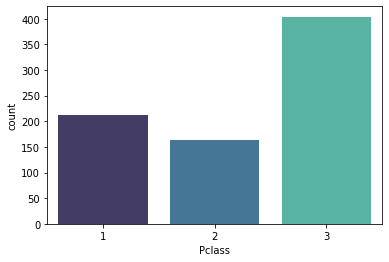

In [19]:
sns.countplot(x='Pclass',data=df,palette="mako")

<AxesSubplot:xlabel='Embarked', ylabel='count'>

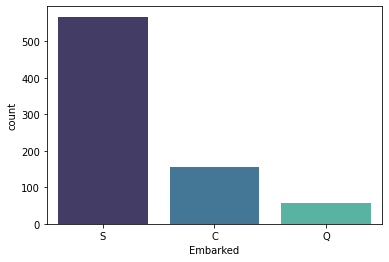

In [20]:
sns.countplot(x='Embarked',data=df,palette="mako")

<AxesSubplot:xlabel='Sex', ylabel='Survived'>

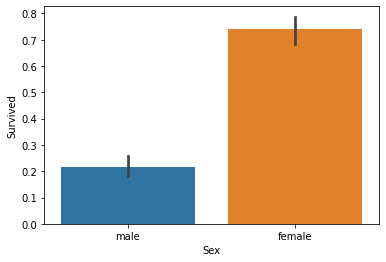

In [21]:
sns.barplot(x="Sex",y="Survived",data=df)

<AxesSubplot:xlabel='Survived', ylabel='count'>

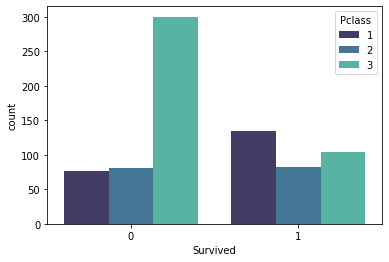

In [22]:
sns.countplot(x='Survived',data=df, palette='mako',hue="Pclass")

<AxesSubplot:xlabel='Survived', ylabel='count'>

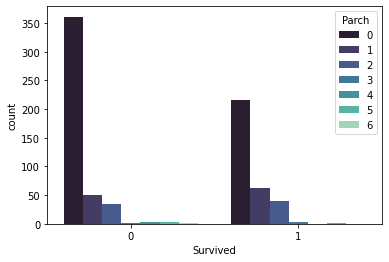

In [23]:
sns.countplot(x='Survived',data=df, palette='mako',hue="Parch")

## Data Preprocessing

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 780 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  780 non-null    int64  
 1   Pclass    780 non-null    int64  
 2   Sex       780 non-null    object 
 3   Age       780 non-null    float64
 4   SibSp     780 non-null    int64  
 5   Parch     780 non-null    int64  
 6   Fare      780 non-null    float64
 7   Embarked  780 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 71.0+ KB


In [25]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [26]:
df=pd.get_dummies(df, columns = ['Sex', 'Embarked','Pclass','Parch'], drop_first=True)

In [27]:
df

,Survived,Age,SibSp,Fare,Sex_male,Embarked_Q,Embarked_S,Pclass_2,Pclass_3,Parch_1,Parch_2,Parch_3,Parch_4,Parch_5,Parch_6
0,0,22.000000,1,7.2500,1,0,1,0,1,0,0,0,0,0,0
1,1,38.000000,1,71.2833,0,0,0,0,0,0,0,0,0,0,0
2,1,26.000000,0,7.9250,0,0,1,0,1,0,0,0,0,0,0
3,1,35.000000,1,53.1000,0,0,1,0,0,0,0,0,0,0,0
4,0,35.000000,0,8.0500,1,0,1,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
885,0,39.000000,0,29.1250,0,1,0,0,1,0,0,0,0,1,0
887,1,19.000000,0,30.0000,0,0,1,0,0,0,0,0,0,0,0
888,0,29.699118,1,23.4500,0,0,1,0,1,0,1,0,0,0,0
889,1,26.000000,0,30.0000,1,0,0,0,0,0,0,0,0,0,0


In [28]:
df.columns

Index(['Survived', 'Age', 'SibSp', 'Fare', 'Sex_male', 'Embarked_Q',
       'Embarked_S', 'Pclass_2', 'Pclass_3', 'Parch_1', 'Parch_2', 'Parch_3',
       'Parch_4', 'Parch_5', 'Parch_6'],
      dtype='object')

In [29]:
x=df.drop(['Survived'],axis=1)
y=df['Survived']

In [30]:
x

,Age,SibSp,Fare,Sex_male,Embarked_Q,Embarked_S,Pclass_2,Pclass_3,Parch_1,Parch_2,Parch_3,Parch_4,Parch_5,Parch_6
0,22.000000,1,7.2500,1,0,1,0,1,0,0,0,0,0,0
1,38.000000,1,71.2833,0,0,0,0,0,0,0,0,0,0,0
2,26.000000,0,7.9250,0,0,1,0,1,0,0,0,0,0,0
3,35.000000,1,53.1000,0,0,1,0,0,0,0,0,0,0,0
4,35.000000,0,8.0500,1,0,1,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
885,39.000000,0,29.1250,0,1,0,0,1,0,0,0,0,1,0
887,19.000000,0,30.0000,0,0,1,0,0,0,0,0,0,0,0
888,29.699118,1,23.4500,0,0,1,0,1,0,1,0,0,0,0
889,26.000000,0,30.0000,1,0,0,0,0,0,0,0,0,0,0


In [31]:
y

0      0
1      1
2      1
3      1
4      0
      ..
885    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 780, dtype: int64

In [32]:
all_features = x.columns
all_features

Index(['Age', 'SibSp', 'Fare', 'Sex_male', 'Embarked_Q', 'Embarked_S',
       'Pclass_2', 'Pclass_3', 'Parch_1', 'Parch_2', 'Parch_3', 'Parch_4',
       'Parch_5', 'Parch_6'],
      dtype='object')

## Feature Selection 1 (SelectKBest - chi2)

In [33]:
selector1 = SelectKBest(k=6, score_func=chi2)

In [34]:
selector1.fit(x, y)

SelectKBest(k=6, score_func=<function chi2 at 0x000002207F385F70>)

In [35]:
selector1.scores_

array([3.08118270e+01, 2.04505206e+00, 3.71723944e+03, 7.70297042e+01,
       1.10617368e+00, 3.54371828e+00, 5.88655616e+00, 4.02459347e+01,
       9.19296913e+00, 4.49361252e+00, 7.22693862e-01, 2.81222707e+00,
       9.34253709e-01, 7.03056769e-01])

In [36]:
pd.DataFrame(selector1.scores_, index=x.columns)

,0
Age,30.811827
SibSp,2.045052
Fare,3717.239436
Sex_male,77.029704
Embarked_Q,1.106174
Embarked_S,3.543718
Pclass_2,5.886556
Pclass_3,40.245935
Parch_1,9.192969
Parch_2,4.493613


In [37]:
selected_features_idx = selector1.get_support(indices=True)
selected_features_idx

array([0, 2, 3, 6, 7, 8], dtype=int64)

In [38]:
selected_features = all_features[selected_features_idx]
selected_features

Index(['Age', 'Fare', 'Sex_male', 'Pclass_2', 'Pclass_3', 'Parch_1'], dtype='object')

In [39]:
x[selected_features]

,Age,Fare,Sex_male,Pclass_2,Pclass_3,Parch_1
0,22.000000,7.2500,1,0,1,0
1,38.000000,71.2833,0,0,0,0
2,26.000000,7.9250,0,0,1,0
3,35.000000,53.1000,0,0,0,0
4,35.000000,8.0500,1,0,1,0
...,...,...,...,...,...,...
885,39.000000,29.1250,0,0,1,0
887,19.000000,30.0000,0,0,0,0
888,29.699118,23.4500,0,0,1,0
889,26.000000,30.0000,1,0,0,0


In [40]:
x_new1=df[['Age', 'Fare', 'Sex_male', 'Pclass_2', 'Pclass_3', 'Parch_1']]
x_new1

,Age,Fare,Sex_male,Pclass_2,Pclass_3,Parch_1
0,22.000000,7.2500,1,0,1,0
1,38.000000,71.2833,0,0,0,0
2,26.000000,7.9250,0,0,1,0
3,35.000000,53.1000,0,0,0,0
4,35.000000,8.0500,1,0,1,0
...,...,...,...,...,...,...
885,39.000000,29.1250,0,0,1,0
887,19.000000,30.0000,0,0,0,0
888,29.699118,23.4500,0,0,1,0
889,26.000000,30.0000,1,0,0,0


## standardisation 

In [41]:
scaler=StandardScaler()

In [42]:
scaler.fit(x_new1)

StandardScaler()

In [43]:
x_new1=scaler.transform(x_new1)

In [44]:
x_new1

array([[-0.56916407, -0.52803267,  0.77353775, -0.51597846,  0.96472435,
        -0.41372838],
       [ 0.59871127,  0.69795603, -1.29276172, -0.51597846, -1.03656552,
        -0.41372838],
       [-0.27719523, -0.51510904, -1.29276172, -0.51597846,  0.96472435,
        -0.41372838],
       ...,
       [-0.00718847, -0.21786566, -1.29276172, -0.51597846,  0.96472435,
        -0.41372838],
       [-0.27719523, -0.09245863,  0.77353775, -0.51597846, -1.03656552,
        -0.41372838],
       [ 0.16075802, -0.51845961,  0.77353775, -0.51597846,  0.96472435,
        -0.41372838]])

In [45]:
y

0      0
1      1
2      1
3      1
4      0
      ..
885    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 780, dtype: int64

## Splitting 1

In [58]:
x_train, x_test, y_train, y_test = train_test_split(x_new1, y, test_size=0.3, random_state=42)

In [59]:
x_train.shape

(546, 6)

In [60]:
y_train.shape

(546,)

In [61]:
x_test.shape

(234, 6)

In [62]:
y_test.shape

(234,)

## Modeling 1

In [63]:
models1 = {
    "LR": LogisticRegression(),
    "KNN": KNeighborsClassifier(),
    "SVC": SVC(),
    "DT": DecisionTreeClassifier(),
    "RF": RandomForestClassifier()
}

In [64]:
for name, model in models1.items():
    print(f'Training Model {name} \n--------------')
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    print(f'Training Accuracy: {accuracy_score(y_train, model.predict(x_train))}')
    print(f'Testing Accuracy: {accuracy_score(y_test, y_pred)}')
    print(f'Testing Confusion Matrix: \n{confusion_matrix(y_test, y_pred)}')          
    print(f'Testing Recall: {recall_score(y_test, y_pred)}')    
    print(f'Testing Precesion: {precision_score(y_test, y_pred)}')
    print(f'Testing F-1: {f1_score(y_test, y_pred)}')
    print(f'Testing F-Beta: {fbeta_score(y_test, y_pred, beta=0.5)}')
    print('-'*30)

Training Model LR 
--------------
Training Accuracy: 0.7728937728937729
Testing Accuracy: 0.811965811965812
Testing Confusion Matrix: 
[[118  21]
 [ 23  72]]
Testing Recall: 0.7578947368421053
Testing Precesion: 0.7741935483870968
Testing F-1: 0.7659574468085107
Testing F-Beta: 0.7708779443254818
------------------------------
Training Model KNN 
--------------
Training Accuracy: 0.8315018315018315
Testing Accuracy: 0.7649572649572649
Testing Confusion Matrix: 
[[112  27]
 [ 28  67]]
Testing Recall: 0.7052631578947368
Testing Precesion: 0.7127659574468085
Testing F-1: 0.7089947089947088
Testing F-Beta: 0.7112526539278131
------------------------------
Training Model SVC 
--------------
Training Accuracy: 0.7838827838827839
Testing Accuracy: 0.7905982905982906
Testing Confusion Matrix: 
[[131   8]
 [ 41  54]]
Testing Recall: 0.5684210526315789
Testing Precesion: 0.8709677419354839
Testing F-1: 0.6878980891719745
Testing F-Beta: 0.7871720116618074
------------------------------
Training 

## Feature Selection 2 (SelectPercentile - f_classif)

In [65]:
selector2=SelectPercentile(score_func = f_classif, percentile=40) 

In [66]:
all_features = x.columns
all_features

Index(['Age', 'SibSp', 'Fare', 'Sex_male', 'Embarked_Q', 'Embarked_S',
       'Pclass_2', 'Pclass_3', 'Parch_1', 'Parch_2', 'Parch_3', 'Parch_4',
       'Parch_5', 'Parch_6'],
      dtype='object')

In [67]:
selector2.fit(x,y)

SelectPercentile(percentile=40)

In [68]:
selector2.scores_

array([  4.90985775,   1.10127464,  50.40481883, 278.77856165,
         1.1938001 ,  13.16271251,   7.50637564,  93.2567627 ,
        10.8892409 ,   4.990719  ,   0.72616854,   2.82973004,
         0.93900213,   0.70278853])

In [69]:
pd.DataFrame(selector2.scores_, index=x.columns)

,0
Age,4.909858
SibSp,1.101275
Fare,50.404819
Sex_male,278.778562
Embarked_Q,1.193800
Embarked_S,13.162713
Pclass_2,7.506376
Pclass_3,93.256763
Parch_1,10.889241
Parch_2,4.990719


In [70]:
selected_features_idx = selector2.get_support(indices=True)
selected_features_idx

array([2, 3, 5, 6, 7, 8], dtype=int64)

In [71]:
selected_features = all_features[selected_features_idx]
selected_features

Index(['Fare', 'Sex_male', 'Embarked_S', 'Pclass_2', 'Pclass_3', 'Parch_1'], dtype='object')

In [72]:
x_new2=df[['Fare', 'Sex_male', 'Embarked_S', 'Pclass_2', 'Pclass_3', 'Parch_1']]
x_new2

,Fare,Sex_male,Embarked_S,Pclass_2,Pclass_3,Parch_1
0,7.2500,1,1,0,1,0
1,71.2833,0,0,0,0,0
2,7.9250,0,1,0,1,0
3,53.1000,0,1,0,0,0
4,8.0500,1,1,0,1,0
...,...,...,...,...,...,...
885,29.1250,0,0,0,1,0
887,30.0000,0,1,0,0,0
888,23.4500,0,1,0,1,0
889,30.0000,1,0,0,0,0


In [73]:
scaler.fit(x_new2)

StandardScaler()

In [75]:
x_new2=scaler.transform(x_new2)

c:\users\friend's net\appdata\local\programs\python\python39\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [76]:
x_train, x_test, y_train, y_test = train_test_split(x_new2, y, test_size=0.3, random_state=42)

In [77]:
models2 = {
    "LR": LogisticRegression(),
    "KNN": KNeighborsClassifier(),
    "SVC": SVC(),
    "DT": DecisionTreeClassifier(),
    "RF": RandomForestClassifier()
}

In [78]:
for name, model in models2.items():
    print(f'Training Model {name} \n--------------')
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    print(f'Training Accuracy: {accuracy_score(y_train, model.predict(x_train))}')
    print(f'Testing Accuracy: {accuracy_score(y_test, y_pred)}')
    print(f'Testing Confusion Matrix: \n{confusion_matrix(y_test, y_pred)}')          
    print(f'Testing Recall: {recall_score(y_test, y_pred)}')    
    print(f'Testing Precesion: {precision_score(y_test, y_pred)}')
    print(f'Testing F-1: {f1_score(y_test, y_pred)}')
    print(f'Testing F-Beta: {fbeta_score(y_test, y_pred, beta=0.5)}')
    print('-'*30)

Training Model LR 
--------------
Training Accuracy: 0.7527472527472527
Testing Accuracy: 0.7435897435897436
Testing Confusion Matrix: 
[[104  35]
 [ 25  70]]
Testing Recall: 0.7368421052631579
Testing Precesion: 0.6666666666666666
Testing F-1: 0.7
Testing F-Beta: 0.6796116504854368
------------------------------
Training Model KNN 
--------------
Training Accuracy: 0.815018315018315
Testing Accuracy: 0.7564102564102564
Testing Confusion Matrix: 
[[118  21]
 [ 36  59]]
Testing Recall: 0.6210526315789474
Testing Precesion: 0.7375
Testing F-1: 0.6742857142857144
Testing F-Beta: 0.7108433734939757
------------------------------
Training Model SVC 
--------------
Training Accuracy: 0.7875457875457875
Testing Accuracy: 0.7948717948717948
Testing Confusion Matrix: 
[[125  14]
 [ 34  61]]
Testing Recall: 0.6421052631578947
Testing Precesion: 0.8133333333333334
Testing F-1: 0.7176470588235295
Testing F-Beta: 0.7721518987341771
------------------------------
Training Model DT 
--------------
Tr

## Feature Selection 3 (SelectFromModel-RandomForestClassifier)

In [79]:
selector3=SelectFromModel(RandomForestClassifier(n_estimators = 1000)) 

In [80]:
selector3.fit(x,y)

SelectFromModel(estimator=RandomForestClassifier(n_estimators=1000))

In [81]:
selector3.get_support()

array([ True, False,  True,  True, False, False, False, False, False,
       False, False, False, False, False])

In [82]:
selected_features_idx = selector3.get_support(indices=True)
selected_features_idx

array([0, 2, 3], dtype=int64)

In [83]:
all_features=x.columns
all_features

Index(['Age', 'SibSp', 'Fare', 'Sex_male', 'Embarked_Q', 'Embarked_S',
       'Pclass_2', 'Pclass_3', 'Parch_1', 'Parch_2', 'Parch_3', 'Parch_4',
       'Parch_5', 'Parch_6'],
      dtype='object')

In [84]:
selected_features = all_features[selected_features_idx]
selected_features

Index(['Age', 'Fare', 'Sex_male'], dtype='object')

In [85]:
x_new3=df[['Age', 'Fare', 'Sex_male']]
x_new3

,Age,Fare,Sex_male
0,22.000000,7.2500,1
1,38.000000,71.2833,0
2,26.000000,7.9250,0
3,35.000000,53.1000,0
4,35.000000,8.0500,1
...,...,...,...
885,39.000000,29.1250,0
887,19.000000,30.0000,0
888,29.699118,23.4500,0
889,26.000000,30.0000,1


In [86]:
scaler.fit(x_new3)

StandardScaler()

In [87]:
x_new3=scaler.transform(x_new3)

In [88]:
x_train, x_test, y_train, y_test = train_test_split(x_new3, y, test_size=0.3, random_state=42)

In [89]:
models3 = {
    "LR": LogisticRegression(),
    "KNN": KNeighborsClassifier(),
    "SVC": SVC(),
    "DT": DecisionTreeClassifier(),
    "RF": RandomForestClassifier()
}

In [90]:
for name, model in models3.items():
    print(f'Training Model {name} \n--------------')
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    print(f'Training Accuracy: {accuracy_score(y_train, model.predict(x_train))}')
    print(f'Testing Accuracy: {accuracy_score(y_test, y_pred)}')
    print(f'Testing Confusion Matrix: \n{confusion_matrix(y_test, y_pred)}')          
    print(f'Testing Recall: {recall_score(y_test, y_pred)}')    
    print(f'Testing Precesion: {precision_score(y_test, y_pred)}')
    print(f'Testing F-1: {f1_score(y_test, y_pred)}')
    print(f'Testing F-Beta: {fbeta_score(y_test, y_pred, beta=0.5)}')
    print('-'*30)

Training Model LR 
--------------
Training Accuracy: 0.7545787545787546
Testing Accuracy: 0.7777777777777778
Testing Confusion Matrix: 
[[113  26]
 [ 26  69]]
Testing Recall: 0.7263157894736842
Testing Precesion: 0.7263157894736842
Testing F-1: 0.7263157894736842
Testing F-Beta: 0.7263157894736842
------------------------------
Training Model KNN 
--------------
Training Accuracy: 0.8351648351648352
Testing Accuracy: 0.7564102564102564
Testing Confusion Matrix: 
[[112  27]
 [ 30  65]]
Testing Recall: 0.6842105263157895
Testing Precesion: 0.7065217391304348
Testing F-1: 0.6951871657754011
Testing F-Beta: 0.7019438444924405
------------------------------
Training Model SVC 
--------------
Training Accuracy: 0.7765567765567766
Testing Accuracy: 0.7863247863247863
Testing Confusion Matrix: 
[[112  27]
 [ 23  72]]
Testing Recall: 0.7578947368421053
Testing Precesion: 0.7272727272727273
Testing F-1: 0.7422680412371135
Testing F-Beta: 0.7331975560081467
------------------------------
Training

## Feature Selection 4 (SelectFromModel-LogisticRegression)

In [91]:
selector4 = SelectFromModel(estimator=LogisticRegression(solver='lbfgs', max_iter=1000))

In [92]:
selector4.fit(x, y)

SelectFromModel(estimator=LogisticRegression(max_iter=1000))

In [93]:
selector4.get_support()

array([False, False, False,  True, False, False,  True,  True, False,
       False, False,  True, False, False])

In [94]:
selected_features_idx = selector4.get_support(indices=True)
selected_features_idx

array([ 3,  6,  7, 11], dtype=int64)

In [95]:
all_features=x.columns
all_features

Index(['Age', 'SibSp', 'Fare', 'Sex_male', 'Embarked_Q', 'Embarked_S',
       'Pclass_2', 'Pclass_3', 'Parch_1', 'Parch_2', 'Parch_3', 'Parch_4',
       'Parch_5', 'Parch_6'],
      dtype='object')

In [96]:
selected_features = all_features[selected_features_idx]
selected_features

Index(['Sex_male', 'Pclass_2', 'Pclass_3', 'Parch_4'], dtype='object')

In [98]:
x_new4=df[['Sex_male', 'Pclass_2', 'Pclass_3', 'Parch_4']]
x_new4

,Sex_male,Pclass_2,Pclass_3,Parch_4
0,1,0,1,0
1,0,0,0,0
2,0,0,1,0
3,0,0,0,0
4,1,0,1,0
...,...,...,...,...
885,0,0,1,0
887,0,0,0,0
888,0,0,1,0
889,1,0,0,0


In [99]:
x_train, x_test, y_train, y_test = train_test_split(x_new4, y, test_size=0.3, random_state=42)

In [100]:
models4 = {
    "LR": LogisticRegression(),
    "KNN": KNeighborsClassifier(),
    "SVC": SVC(),
    "DT": DecisionTreeClassifier(),
    "RF": RandomForestClassifier()
}

In [101]:
for name, model in models4.items():
    print(f'Training Model {name} \n--------------')
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    print(f'Training Accuracy: {accuracy_score(y_train, model.predict(x_train))}')
    print(f'Testing Accuracy: {accuracy_score(y_test, y_pred)}')
    print(f'Testing Confusion Matrix: \n{confusion_matrix(y_test, y_pred)}')          
    print(f'Testing Recall: {recall_score(y_test, y_pred)}')    
    print(f'Testing Precesion: {precision_score(y_test, y_pred)}')
    print(f'Testing F-1: {f1_score(y_test, y_pred)}')
    print(f'Testing F-Beta: {fbeta_score(y_test, y_pred, beta=0.5)}')
    print('-'*30)

Training Model LR 
--------------
Training Accuracy: 0.7637362637362637
Testing Accuracy: 0.782051282051282
Testing Confusion Matrix: 
[[114  25]
 [ 26  69]]
Testing Recall: 0.7263157894736842
Testing Precesion: 0.7340425531914894
Testing F-1: 0.7301587301587302
Testing F-Beta: 0.7324840764331211
------------------------------
Training Model KNN 
--------------
Training Accuracy: 0.7692307692307693
Testing Accuracy: 0.7905982905982906
Testing Confusion Matrix: 
[[135   4]
 [ 45  50]]
Testing Recall: 0.5263157894736842
Testing Precesion: 0.9259259259259259
Testing F-1: 0.6711409395973154
Testing F-Beta: 0.8038585209003215
------------------------------
Training Model SVC 
--------------
Training Accuracy: 0.7692307692307693
Testing Accuracy: 0.7905982905982906
Testing Confusion Matrix: 
[[135   4]
 [ 45  50]]
Testing Recall: 0.5263157894736842
Testing Precesion: 0.9259259259259259
Testing F-1: 0.6711409395973154
Testing F-Beta: 0.8038585209003215
------------------------------
Training 